# Step 1: Import Required Libraries

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report, confusion_matrix
import random
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Step 2: Import the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
'''
# Define the path to the dataset
#base_dir = './drive/MyDrive/DeepL_BI_codes/project/AugmentedAlzheimerDataset'
base_dir = './drive/MyDrive/DeepL_BI_codes/project/OriginalDataset'

# Define image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Define transformations for training and validation
train_transforms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = ImageFolder(root=base_dir, transform=train_transforms)

# Split into training and validation sets (80-20 split)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Apply validation transforms to the validation dataset
val_dataset.dataset.transform = val_transforms

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Class indices:", dataset.class_to_idx)
'''

'\n# Define the path to the dataset\n#base_dir = \'./drive/MyDrive/DeepL_BI_codes/project/AugmentedAlzheimerDataset\'\nbase_dir = \'./drive/MyDrive/DeepL_BI_codes/project/OriginalDataset\'\n\n# Define image dimensions and batch size\nIMG_HEIGHT = 128\nIMG_WIDTH = 128\nBATCH_SIZE = 32\n\n# Define transformations for training and validation\ntrain_transforms = transforms.Compose([\n    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),\n    transforms.RandomRotation(20),\n    transforms.RandomHorizontalFlip(),\n    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n])\n\nval_transforms = transforms.Compose([\n    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n])\n\n# Load the dataset\ndataset = ImageFolder(root=base_dir, transform=train_transform

In [5]:
# Define the path to the dataset
base_dir = './drive/MyDrive/DeepL_BI_codes/project/AugmentedAlzheimerDataset'

# Define image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Define the number of items to use from the dataset
NUM_ITEMS_TO_USE = 1000  # Change this to the desired number of items

# Define transformations for training and validation
train_transforms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the full dataset
dataset = ImageFolder(root=base_dir, transform=train_transforms)
print("Total number of items in the original dataset:", len(dataset))

# Create a subset with the specified number of items
if NUM_ITEMS_TO_USE > len(dataset):
    raise ValueError(f"Requested {NUM_ITEMS_TO_USE} items, but dataset only has {len(dataset)} items.")
indices = np.random.choice(len(dataset), NUM_ITEMS_TO_USE, replace=False)  # Randomly select indices
subset_dataset = Subset(dataset, indices)

# Split the subset into training and validation sets (80-20 split)
train_size = int(0.8 * len(subset_dataset))
val_size = len(subset_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(subset_dataset, [train_size, val_size])

# Apply validation transforms to the validation dataset
val_dataset.dataset.dataset.transform = val_transforms

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Class indices:", dataset.class_to_idx)
print("Number of items in the subset dataset:", len(subset_dataset))
print("Number of items in the training set:", len(train_dataset))
print("Number of items in the validation set:", len(val_dataset))

Total number of items in the original dataset: 30777
Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Number of items in the subset dataset: 1000
Number of items in the training set: 800
Number of items in the validation set: 200


In [6]:
# 1. Number of images in the original dataset
total_images = len(dataset)
print("Number of images in the original dataset:", total_images)

# 2. Get the shape of a single image
sample_image, _ = dataset[0]  # Get the first image (already transformed to tensor)
image_shape = sample_image.shape
print("Shape of a single image (channels, height, width):", image_shape)

# 3. Calculate the size of a single image in bytes
# - Each pixel value in a tensor is typically a float32 (4 bytes)
# - Size = channels * height * width * 4 bytes
image_size_bytes = image_shape[0] * image_shape[1] * image_shape[2] * 4
print("Size of a single image in bytes:", image_size_bytes)
print("Size of a single image in KB:", image_size_bytes / 1024)

# Extract and print the shape of the loaded data
# Get one batch from the train_loader
train_iter = iter(train_loader)
train_images, train_labels = next(train_iter)
print("Training data shape (images):", train_images.shape)  # Expected: (batch_size, 3, IMG_HEIGHT, IMG_WIDTH)
print("Training labels shape:", train_labels.shape)        # Expected: (batch_size,)

# Get one batch from the val_loader
val_iter = iter(val_loader)
val_images, val_labels = next(val_iter)
print("Validation data shape (images):", val_images.shape)  # Expected: (batch_size, 3, IMG_HEIGHT, IMG_WIDTH)
print("Validation labels shape:", val_labels.shape)        # Expected: (batch_size,)

print("Total dataset size:", len(dataset))
print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))

Number of images in the original dataset: 30777
Shape of a single image (channels, height, width): torch.Size([3, 128, 128])
Size of a single image in bytes: 196608
Size of a single image in KB: 192.0
Training data shape (images): torch.Size([32, 3, 128, 128])
Training labels shape: torch.Size([32])
Validation data shape (images): torch.Size([32, 3, 128, 128])
Validation labels shape: torch.Size([32])
Total dataset size: 30777
Training dataset size: 800
Validation dataset size: 200


Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


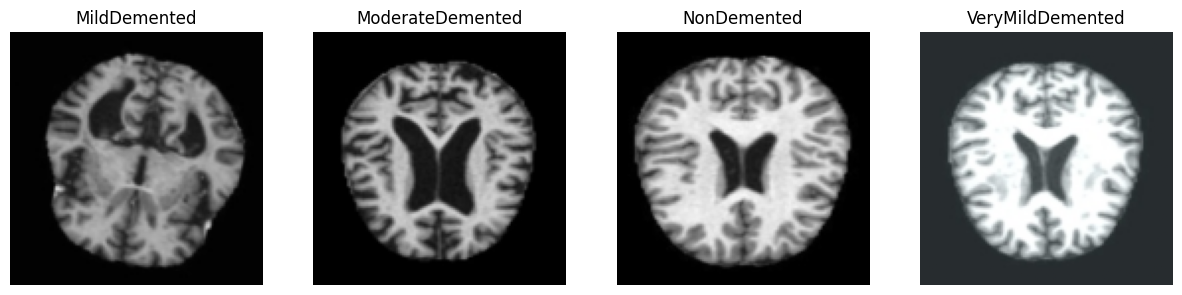

In [14]:
# Define a basic transformation to load and resize images
basic_transforms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor()
])

# Get class names
class_names = list(dataset.class_to_idx.keys())
print("Class names:", class_names)

# Get a list of all samples (image paths and labels)
samples = dataset.samples  # List of (image_path, label) tuples

# Organize samples by class
class_to_samples = {i: [] for i in range(len(class_names))}
for img_path, label in samples:
    class_to_samples[label].append(img_path)

# Randomly select one image per class
images_to_display = {}
for label, img_paths in class_to_samples.items():
    class_name = class_names[label]
    random_img_path = random.choice(img_paths)  # Pick a random image
    image = Image.open(random_img_path).convert('RGB')  # Load the image
    image = basic_transforms(image)  # Apply transformations
    images_to_display[class_name] = image

# Plot one image from each class
fig, axes = plt.subplots(1, len(class_names), figsize=(15, 4))
for ax, (class_name, image) in zip(axes, images_to_display.items()):
    # Convert the image tensor to numpy for plotting (C, H, W) -> (H, W, C)
    image_np = image.permute(1, 2, 0).numpy()
    ax.imshow(image_np)
    ax.set_title(class_name)
    ax.axis('off')

plt.show()

# Step 3: Build the Convolutional Neural Network (CNN)

We’ll define a CNN architecture using PyTorch’s nn.Module.

In [21]:
# Define the CNN model
class AlzheimerforCNN(nn.Module):
    def __init__(self):
        super(AlzheimerfprCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        # Calculate the size of the flattened layer
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1, self.relu, self.pool,
            self.conv2, self.relu, self.pool,
            self.conv3, self.relu, self.pool
        )
        self._get_conv_output_size()

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, 4)  # 4 classes

    def _get_conv_output_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, IMG_HEIGHT, IMG_WIDTH)
            x = self.convs(x)
            self._to_linear = int(np.prod(x.size()))

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlzheimerforCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Display the model architecture
print(model)

AlzheimerCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (convs): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=32768, out_features=128, bias=

In [23]:
from tabulate import tabulate

# Function to summarize the model architecture in a table
def summarize_model(model):
    table = []
    total_params = 0
    current_shape = (3, IMG_HEIGHT, IMG_WIDTH)  # Initial input shape (C, H, W)

    # Helper function to calculate the number of parameters
    def count_parameters(layer):
        return sum(p.numel() for p in layer.parameters() if p.requires_grad)

    # Helper function to compute output shape for Conv2d and MaxPool2d
    def compute_output_shape(layer, input_shape):
        if isinstance(layer, nn.Conv2d):
            C_in, H_in, W_in = input_shape
            C_out = layer.out_channels
            H_out = (H_in + 2 * layer.padding[0] - layer.kernel_size[0]) // layer.stride[0] + 1
            W_out = (W_in + 2 * layer.padding[1] - layer.kernel_size[1]) // layer.stride[1] + 1
            return (C_out, H_out, W_out)
        elif isinstance(layer, nn.MaxPool2d):
            C_in, H_in, W_in = input_shape
            H_out = H_in // layer.kernel_size
            W_out = W_in // layer.kernel_size
            return (C_in, H_out, W_out)
        return input_shape

    # Iterate through the layers in the model
    for name, layer in model.named_modules():
        if name in ['conv1', 'conv2', 'conv3', 'pool', 'fc1', 'fc2', 'dropout', 'relu']:
            # Compute input and output shapes
            if name in ['conv1', 'conv2', 'conv3', 'pool']:
                output_shape = compute_output_shape(layer, current_shape)
            elif name == 'fc1':
                output_shape = (128,)  # Output of fc1
                current_shape = (model._to_linear,)  # Input to fc1
            elif name == 'fc2':
                output_shape = (4,)  # Output of fc2
                current_shape = (128,)  # Input to fc2
            else:
                output_shape = current_shape  # For ReLU and Dropout, shape doesn't change

            # Count parameters (skip for ReLU and Dropout as they have no parameters)
            params = count_parameters(layer) if not isinstance(layer, (nn.ReLU, nn.Dropout)) else 0
            total_params += params

            # Add row to table
            table.append([
                name,
                str(layer).split('(')[0],
                current_shape,
                output_shape,
                params
            ])

            # Update current shape for the next layer
            if name in ['conv1', 'conv2', 'conv3', 'pool', 'fc1', 'fc2']:
                current_shape = output_shape

    # Print the table
    headers = ["Layer Name", "Layer Type", "Input Shape", "Output Shape", "Parameters"]
    print(tabulate(table, headers=headers, tablefmt="grid"))
    print(f"\nTotal Parameters: {total_params}")

# Display the model architecture in a table
summarize_model(model)

+--------------+--------------+-----------------+-----------------+--------------+
| Layer Name   | Layer Type   | Input Shape     | Output Shape    |   Parameters |
+==============+==============+=================+=================+==============+
| conv1        | Conv2d       | (3, 128, 128)   | (32, 128, 128)  |          896 |
+--------------+--------------+-----------------+-----------------+--------------+
| conv2        | Conv2d       | (32, 128, 128)  | (64, 128, 128)  |        18496 |
+--------------+--------------+-----------------+-----------------+--------------+
| conv3        | Conv2d       | (64, 128, 128)  | (128, 128, 128) |        73856 |
+--------------+--------------+-----------------+-----------------+--------------+
| pool         | MaxPool2d    | (128, 128, 128) | (128, 64, 64)   |            0 |
+--------------+--------------+-----------------+-----------------+--------------+
| relu         | ReLU         | (128, 64, 64)   | (128, 64, 64)   |            0 |
+---

# Step 4: Train the Model

Train the model using the training and validation data loaders.

In [16]:
# Training loop
EPOCHS = 20
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{EPOCHS}] - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

Epoch [1/20] - Train Loss: 1.4234, Train Acc: 28.88%, Val Loss: 1.3803, Val Acc: 22.00%
Epoch [2/20] - Train Loss: 1.3816, Train Acc: 31.62%, Val Loss: 1.3511, Val Acc: 38.50%
Epoch [3/20] - Train Loss: 1.3780, Train Acc: 28.88%, Val Loss: 1.3488, Val Acc: 38.00%
Epoch [4/20] - Train Loss: 1.3677, Train Acc: 34.25%, Val Loss: 1.3299, Val Acc: 40.00%
Epoch [5/20] - Train Loss: 1.3185, Train Acc: 39.12%, Val Loss: 1.2823, Val Acc: 45.50%
Epoch [6/20] - Train Loss: 1.2699, Train Acc: 41.62%, Val Loss: 1.2786, Val Acc: 41.00%
Epoch [7/20] - Train Loss: 1.1803, Train Acc: 48.50%, Val Loss: 1.0987, Val Acc: 49.50%
Epoch [8/20] - Train Loss: 1.0225, Train Acc: 56.62%, Val Loss: 0.9994, Val Acc: 57.00%
Epoch [9/20] - Train Loss: 0.8936, Train Acc: 62.75%, Val Loss: 0.9375, Val Acc: 61.00%
Epoch [10/20] - Train Loss: 0.7667, Train Acc: 67.88%, Val Loss: 0.9674, Val Acc: 61.50%
Epoch [11/20] - Train Loss: 0.6911, Train Acc: 72.00%, Val Loss: 0.9329, Val Acc: 60.50%
Epoch [12/20] - Train Loss: 0.

# Step 5: Evaluate the Model

Plot the training and validation accuracy/loss.

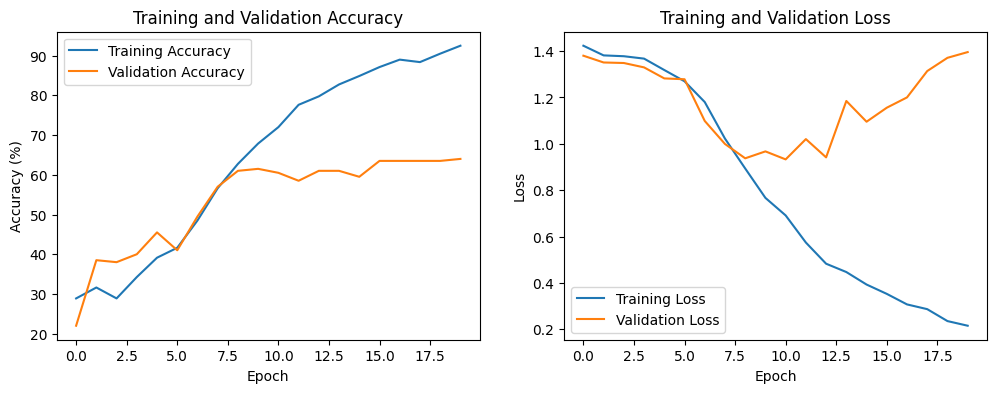

In [17]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 6: Make Predictions and Analyze Results

Generate predictions and display a confusion matrix and classification report.

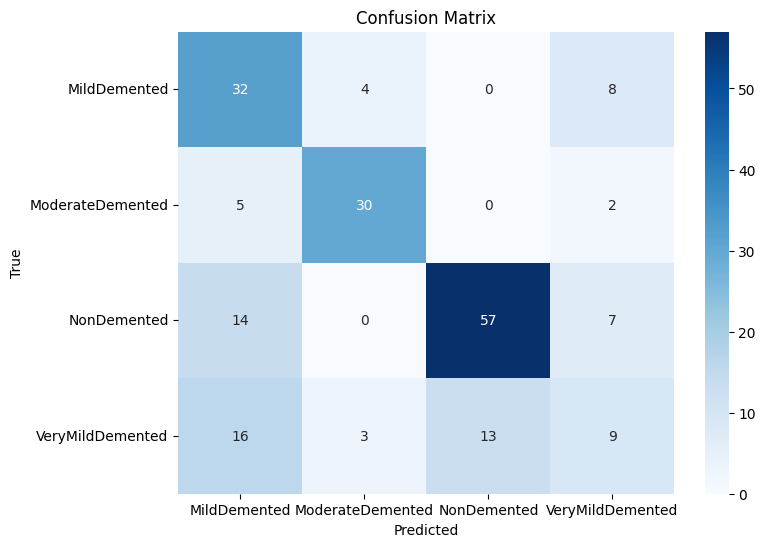

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.48      0.73      0.58        44
ModerateDemented       0.81      0.81      0.81        37
     NonDemented       0.81      0.73      0.77        78
VeryMildDemented       0.35      0.22      0.27        41

        accuracy                           0.64       200
       macro avg       0.61      0.62      0.61       200
    weighted avg       0.64      0.64      0.63       200



In [18]:
# Get predictions
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(dataset.class_to_idx.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))